## Assignment 4: Obsevational Studies and Applied ML

### Deadline
November 21st,11:59PM

### Important notes

Make sure you push on GitHub your notebook with all the cells already evaluated. Don't forget to add a textual description of your thought process, the assumptions you made, and the solution you implemented. Back up any hypotheses and claims with data, since this is an important aspect of the course. Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the data files necessary) in the master branch. If there are multiple notebooks present, we will not grade anything.

Use this legendary link to create your repository: [link](https://classroom.github.com/g/YXtsr0QK)

In [1]:
# Put your imports here
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_folder = './data/'
task_1_folder = data_folder + 'Task_1/'
task_2_folder = data_folder + 'Task_2/'

## Task 1: Boosting the economy by incentivizing self-employment

Assume the biggest priority of the local government in 2018 is to increase per-capita income. To do so, the officials plan to adopt a strategy for incentivizing self-employment through a series of campaigns, educational programs, and dedicated funds.

Since it is unethical and impossible in this setting to run a controlled experiment involving citizens (e.g., fire employees and force them to self-employ), the officials have asked you, the data scientist, to establish the effect of self-employment on the economy, relying on observational data.

**A)** You will be working with the full US 2015 census dataset (acs2015_county_data.csv, available at https://www.kaggle.com/muonneutrino/us-census-demographic-data#acs2015_county_data.csv). Using suitable methods, determine and quantify the dependency between the percentage of self-employed citizens and per capita income across all 3,220 US counties. Do citizens in counties that have a higher percentage of self-employed people earn more per capita?

**B)** The pilot program will involve all counties within a limited set of three US states. Set A includes Wisconsin, Tennessee, and  Minnesota. Quantify the dependency of per-capita income on self-employment rates across all the counties in set A.

**C)** In which state within set A is the observed effect of self-employment on per-capita income the strongest?

**D)** Set B includes New Jersey, Kansas, and Rhode Island. Repeat the analysis from steps B and C above, but now for set B. In which of the two sets A and B (if any) would you recommend incentivizing self-employment? Explain your reasoning.

Hint: It is useful to add a notion of confidence to your results and explore the data visually. You are allowed to use the SciPy library.

In [3]:
#Load data
county_data = pd.read_csv(task_1_folder + 'acs2015_county_data.csv')

In [4]:
county_data.head(5)

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7


In [5]:
county_data.columns

Index(['CensusId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen', 'Income',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [6]:
#First, get only relevant columns for the task
employment_data = county_data[['CensusId', 'State', 'County', 'Citizen', 'IncomeErr', 'IncomePerCap',
                                         'IncomePerCapErr', 'SelfEmployed']]

employment_data.head(5)

,CensusId,State,County,Citizen,IncomeErr,IncomePerCap,IncomePerCapErr,SelfEmployed
0,1001,Alabama,Autauga,40725,2391.0,24974,1080,5.5
1,1003,Alabama,Baldwin,147695,1263.0,27317,711,5.8
2,1005,Alabama,Barbour,20714,2973.0,16824,798,7.3
3,1007,Alabama,Bibb,17495,3995.0,18431,1618,6.7
4,1009,Alabama,Blount,42345,3141.0,20532,708,4.2


In [7]:
employment_data['County'].count()

3220

__A) You will be working with the full US 2015 census dataset (acs2015_county_data.csv, available at https://www.kaggle.com/muonneutrino/us-census-demographic-data#acs2015_county_data.csv). Using suitable methods, determine and quantify the dependency between the percentage of self-employed citizens and per capita income across all 3,220 US counties. Do citizens in counties that have a higher percentage of self-employed people earn more per capita?__

In [8]:
#Get the columns that interest us
counties_employment = employment_data[['CensusId','IncomePerCap', 'SelfEmployed']].set_index(['CensusId'])
len(counties_employment)

3220

First, we will try a scatter plot to see if there is a visible correlation.

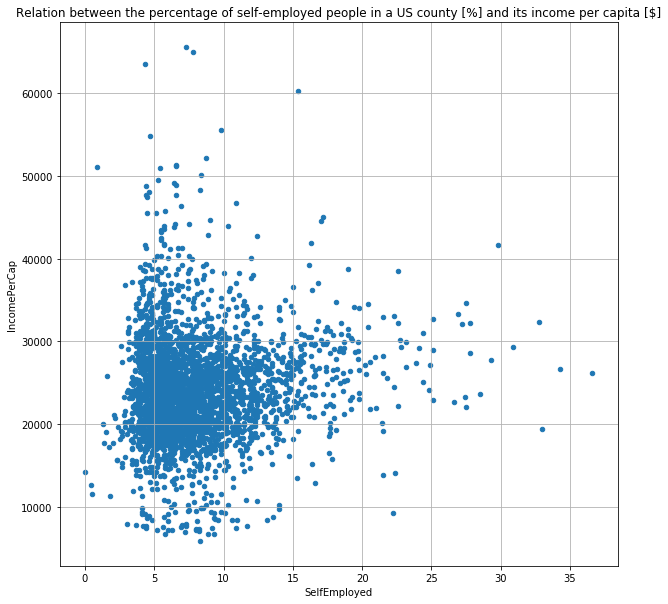

In [9]:
counties_employment.plot(kind='scatter',
             x='SelfEmployed', y='IncomePerCap', figsize=(10, 10), grid=True,
            title='Relation between the percentage of self-employed people in a US county [%] and its income per capita [$]')

In [10]:
counties_employment.describe()

,IncomePerCap,SelfEmployed
count,3220.000000,3220.000000
mean,23981.771739,7.931801
std,6204.339960,3.914974
min,5878.000000,0.000000
25%,20238.500000,5.400000
50%,23460.000000,6.900000
75%,27053.250000,9.400000
max,65600.000000,36.600000


This is a bit of a mess, but on the bright side, there aren't too many outliers (median is close to mean), so we can probably trust Pearson (which is vulnerable around outliers).

In [11]:
counties_employment.corr('pearson')

,IncomePerCap,SelfEmployed
IncomePerCap,1.000000,0.087274
SelfEmployed,0.087274,1.000000


In [12]:
counties_employment.corr('spearman')

,IncomePerCap,SelfEmployed
IncomePerCap,1.000000,0.056414
SelfEmployed,0.056414,1.000000


In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_predict

Testing both Pearson and Spearman coefficients (just in case), we see values very close to 0, that is, no linear correlation.

In [14]:
X = counties_employment.SelfEmployed
y = counties_employment.IncomePerCap

__B) The pilot program will involve all counties within a limited set of three US states. Set A includes Wisconsin, Tennessee, and Minnesota. Quantify the dependency of per-capita income on self-employment rates across all the counties in set A.__

In [15]:
#Get the data we want
wisconsin_data = county_data[county_data['State'] == 'Wisconsin'][['CensusId', 'County', 'IncomePerCap', 'SelfEmployed']]\
                        .set_index('CensusId')

tennessee_data = county_data[county_data['State'] == 'Tennessee'][['CensusId', 'County', 'IncomePerCap', 'SelfEmployed']]\
                        .set_index('CensusId')

minnesota_data = county_data[county_data['State'] == 'Minnesota'][['CensusId', 'County', 'IncomePerCap', 'SelfEmployed']]\
                        .set_index('CensusId')

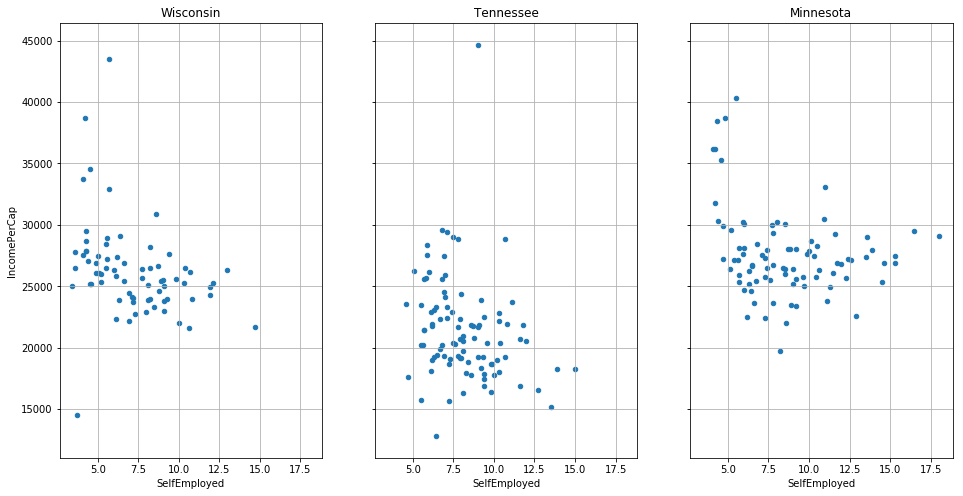

In [16]:
#For starters, plot it:
fig, axs = plt.subplots(1, 3, sharex=True, sharey=True)
wisconsin_data.plot(kind='scatter', x='SelfEmployed', y='IncomePerCap', ax=axs[0], figsize=(16, 8), 
                    title='Wisconsin', grid=True)
tennessee_data.plot(kind='scatter', x='SelfEmployed', y='IncomePerCap', ax=axs[1], grid=True, title='Tennessee')
minnesota_data.plot(kind='scatter', x='SelfEmployed', y='IncomePerCap', ax=axs[2], grid=True, title='Minnesota')

In [17]:
wisconsin_data.corr('pearson')


,IncomePerCap,SelfEmployed
IncomePerCap,1.000000,-0.329053
SelfEmployed,-0.329053,1.000000


In [18]:
wisconsin_data.corr('spearman')

,IncomePerCap,SelfEmployed
IncomePerCap,1.000000,-0.463513
SelfEmployed,-0.463513,1.000000


In [19]:
tennessee_data.corr('pearson')

,IncomePerCap,SelfEmployed
IncomePerCap,1.00000,-0.23836
SelfEmployed,-0.23836,1.00000


In [20]:
tennessee_data.corr('spearman')

,IncomePerCap,SelfEmployed
IncomePerCap,1.000000,-0.316991
SelfEmployed,-0.316991,1.000000


In [21]:
minnesota_data.corr('pearson')

,IncomePerCap,SelfEmployed
IncomePerCap,1.000000,-0.253855
SelfEmployed,-0.253855,1.000000


In [22]:
minnesota_data.corr('spearman')

,IncomePerCap,SelfEmployed
IncomePerCap,1.000000,-0.211075
SelfEmployed,-0.211075,1.000000


With outliers removed:

__C) In which state within set A is the observed effect of self-employment on per-capita income the strongest?__

__D) Set B includes New Jersey, Kansas, and Rhode Island. Repeat the analysis from steps B and C above, but now for set B. In which of the two sets A and B (if any) would you recommend incentivizing self-employment? Explain your reasoning.__

## Task 2: All you need is love… And a dog!

Here we are going to build a classifier to predict whether an animal from an animal shelter will be adopted or not (aac_intakes_outcomes.csv, available at: https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-intakes-and-outcomes/version/1#aac_intakes_outcomes.csv). You will be working with the following features:

1. *animal_type:* Type of animal. May be one of 'cat', 'dog', 'bird', etc.
2. *intake_year:* Year of intake
3. *intake_condition:* The intake condition of the animal. Can be one of 'normal', 'injured', 'sick', etc.
4. *intake_number:* The intake number denoting the number of occurrences the animal has been brought into the shelter. Values higher than 1 indicate the animal has been taken into the shelter on more than one occasion.
5. *intake_type:* The type of intake, for example, 'stray', 'owner surrender', etc.
6. *sex_upon_intake:* The gender of the animal and if it has been spayed or neutered at the time of intake
7. *age_upon\_intake_(years):* The age of the animal upon intake represented in years
8. *time_in_shelter_days:* Numeric value denoting the number of days the animal remained at the shelter from intake to outcome.
9. *sex_upon_outcome:* The gender of the animal and if it has been spayed or neutered at time of outcome
10. *age_upon\_outcome_(years):* The age of the animal upon outcome represented in years
11. *outcome_type:* The outcome type. Can be one of ‘adopted’, ‘transferred’, etc.

**A)** Load the dataset and convert categorical features to a suitable numerical representation (use dummy-variable encoding). Split the data into a training set (80%) and a test set (20%). Pair each feature vector with the corresponding label, i.e., whether the outcome_type is adoption or not. Standardize the values of each feature in the data to have mean 0 and variance 1. The use of external libraries is not permitted in part A, except for numpy and pandas.

**B)** Train a logistic regression classifier on your training set. Logistic regression returns probabilities as predictions, so in order to arrive at a binary prediction, you need to put a threshold on the predicted probabilities. For the decision threshold of 0.5, present the performance of your classifier on the test set by displaying the confusion matrix. Based on the confusion matrix, manually calculate accuracy, precision, recall, and F1-score with respect to the positive and the negative class. Vary the value of the threshold in the range from 0 to 1 and visualize the value of accuracy, precision, recall, and F1-score (with respect to both classes) as a function of the threshold. The shelter has a limited capacity and has no other option but to put to sleep animals with a low probability of adoption. What metric (precision, recall, accuracy, or F1-score) and with respect to what class is the most relevant when choosing the threshold in this scenario, and why? Explain your reasoning.

**C)** Reduce the number of features by selecting the subset of the k best features. Use greedy backward selection to iteratively remove features. Evaluate performance and visualize the result using 5-fold cross-validation on the training set as a function of k, where k = 1, 5, 10, 15, 20, 25, 30. Choose the optimal k and justify your choice. Interpret the top-k features and their impact on the probability of adoption.

**D)** Train a random forest. Use 5-fold cross-validation on the training set to fine-tune the parameters of the classifier using a grid search on the number of estimators "n_estimators" and the max depth of the trees "max_depth". For the chosen parameters, estimate the performance of your classifier on the test set by presenting the confusion matrix, accuracy, precision, recall, and F1-score with respect to both classes and compare the performance with the performance of the logistic regression. Interpret the results.

You are allowed to use the scikit-learn library to implement your classifiers.